In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('../data/synthetic_data.csv')
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,_diag_1,_diag_2,_diag_3
0,Caucasian,Female,[60-70),3,40,0,14,0,1,1,...,No,No,No,No,No,Yes,<30,Supplemental classification,Diseases of the skin and subcutaneous tissue,"Endocrine, nutritional, and metabolic diseases..."
1,Caucasian,Male,[50-60),5,40,0,5,0,0,0,...,No,No,No,No,No,Yes,NO,Injury and poisoning,Diabetes mellitus,Diseases of the circulatory system
2,Caucasian,Female,[50-60),1,43,0,23,0,0,3,...,No,No,No,No,Ch,Yes,>30,Diseases of the circulatory system,Diseases of the skin and subcutaneous tissue,Injury and poisoning
3,Caucasian,Female,[70-80),1,41,5,14,0,12,3,...,No,No,No,No,Ch,Yes,>30,Diseases of the respiratory system,Diseases of the musculoskeletal system and con...,Diseases of the circulatory system
4,Caucasian,Female,[80-90),4,68,2,17,0,0,1,...,No,No,No,No,Ch,Yes,>30,Diseases of the circulatory system,Diseases of the respiratory system,Injury and poisoning


In [3]:
feature_description = pd.read_csv('../data/feature_descriptions.csv')

In [4]:
feature_description

,feature,description
0,race,"Values: Caucasian, Asian, African American, Hi..."
1,gender,Values: male and female
2,age,"Grouped in 10-year intervals: [0, 10), [10, 20..."
3,time_in_hospital,Integer number of days between admission and d...
4,num_lab_procedures,Number of lab tests performed during the encou...
5,num_procedures,Number of procedures (other than lab tests) pe...
6,num_medications,Number of distinct generic names administered ...
7,number_outpatient,Number of outpatient visits of the patient in ...
8,number_emergency,Number of emergency visits of the patient in t...
9,number_inpatient,Number of inpatient visits of the patient in t...


In [5]:
df['readmitted'].value_counts()
readmitted_mapper = {'NO': 0, '<30': 1, '>30': 2}
df['readmitted'] = [readmitted_mapper[item] for item in df['readmitted']]

In [6]:
df['diabetesMed'].value_counts()
diabetesMed_mapper = {'No': 0, 'Yes': 1}
df['diabetesMed'] = [diabetesMed_mapper[item] for item in df['diabetesMed']]

In [7]:
df['race'].value_counts()
# race_mapper = {'No': 0, 'Yes': 1}
# df['diabetesMed'] = [diabetesMed_mapper[item] for item in df['diabetesMed']]

Caucasian          64217
AfricanAmerican    11386
Hispanic            1059
Other               1025
Asian                754
Name: race, dtype: int64

In [8]:
# sns.pairplot(df.iloc[list(range(0, len(df), 100))])

<AxesSubplot:xlabel='readmitted', ylabel='num_lab_procedures'>

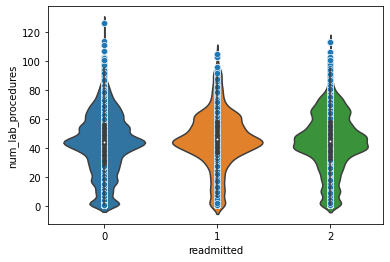

In [9]:
# violin plot where x = readmission, y = all others
sns.violinplot(x = df['readmitted'], y=df['num_lab_procedures'])
sns.scatterplot(x = df['readmitted'], y=df['num_lab_procedures'])

In [10]:
df.iloc[:5, 13:36]

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,No,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Down,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [11]:
df['metformin'].value_counts()
medication_mapper = {'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
for col in df.columns[13:36]:
    # df[col] = [medication_mapper[item] for item in df[col]]
    pass


In [12]:
# number of patients in which med was prescribed 
(df.iloc[:, 13:36] != 'No').sum()
df.iloc[:, 13:36]

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,No,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Down,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78436,Steady,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
78437,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
78438,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
78439,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [13]:
(df.iloc[:, 13:36] != 'No').sum(axis=1).value_counts().sort_index() / len(df)

0    0.265971
1    0.401359
2    0.230339
3    0.077714
4    0.020474
5    0.003582
6    0.000421
7    0.000115
8    0.000025
dtype: float64

In [14]:
df[df['glimepiride-pioglitazone'] != 'No'].iloc[0, 13:36]

metformin                       No
repaglinide                     No
nateglinide                     No
chlorpropamide                  No
glimepiride                     Up
acetohexamide                   No
glipizide                       No
glyburide                       No
tolbutamide                     No
pioglitazone                    No
rosiglitazone               Steady
acarbose                        No
miglitol                        No
troglitazone                    No
tolazamide                      No
examide                         No
citoglipton                     No
insulin                         No
glyburide-metformin             No
glipizide-metformin             No
glimepiride-pioglitazone    Steady
metformin-rosiglitazone         No
metformin-pioglitazone          No
Name: 123, dtype: object

In [15]:
df[df['glyburide-metformin'] != 'No'].iloc[6, 13:36]

metformin                   Steady
repaglinide                     No
nateglinide                     No
chlorpropamide                  No
glimepiride                     No
acetohexamide                   No
glipizide                       No
glyburide                       No
tolbutamide                     No
pioglitazone                Steady
rosiglitazone                   No
acarbose                        No
miglitol                        No
troglitazone                    No
tolazamide                      No
examide                         No
citoglipton                     No
insulin                         No
glyburide-metformin         Steady
glipizide-metformin             No
glimepiride-pioglitazone        No
metformin-rosiglitazone         No
metformin-pioglitazone          No
Name: 413, dtype: object

In [18]:
real_data = pd.read_csv('../Strack_2014/diabetic_data_initial.csv')

In [19]:
(real_data.iloc[:, 24:47] != 'No').sum()

metformin                   19988
repaglinide                  1539
nateglinide                   703
chlorpropamide                 86
glimepiride                  5191
acetohexamide                   1
glipizide                   12686
glyburide                   10650
tolbutamide                    23
pioglitazone                 7328
rosiglitazone                6365
acarbose                      308
miglitol                       38
troglitazone                    3
tolazamide                     39
examide                         0
citoglipton                     0
insulin                     54383
glyburide-metformin           706
glipizide-metformin            13
glimepiride-pioglitazone        1
metformin-rosiglitazone         2
metformin-pioglitazone          1
dtype: int64

In [20]:
(real_data.iloc[:, 24:47] != 'No').sum(axis=1).value_counts().sort_index() / len(real_data)

0    0.229969
1    0.464929
2    0.214934
3    0.076430
4    0.013118
5    0.000570
6    0.000049
dtype: float64

In [21]:
real_data.columns[24:47]
real_data[real_data['glipizide-metformin'] != 'No'].iloc[3, 24:47]

metformin                       No
repaglinide                     No
nateglinide                     No
chlorpropamide                  No
glimepiride                     No
acetohexamide                   No
glipizide                       No
glyburide                       No
tolbutamide                     No
pioglitazone                    No
rosiglitazone                   No
acarbose                        No
miglitol                        No
troglitazone                    No
tolazamide                      No
examide                         No
citoglipton                     No
insulin                         No
glyburide-metformin             No
glipizide-metformin         Steady
glimepiride-pioglitazone        No
metformin-rosiglitazone         No
metformin-pioglitazone          No
Name: 44563, dtype: object

## Upset plot combination drugs

{med1: [index1, index2]}

compare between real and synthetic data

In [22]:
contents_synthetic = {
    col: df[df[col] != 'No'].index
    for col in df.columns[13:36]
}
# contents_synthetic

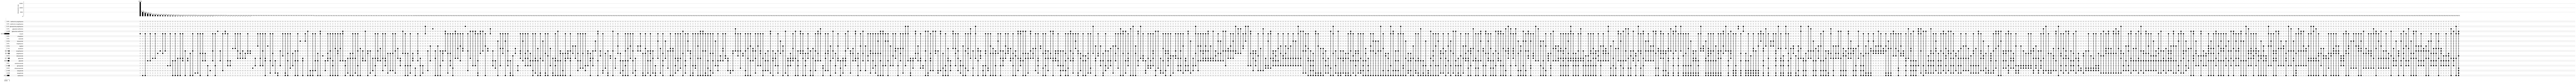

In [23]:
import upsetplot
upsetplot.plot(upsetplot.from_contents(contents_synthetic), sort_by = 'cardinality', sort_categories_by = None, show_percentages = True)
plt.savefig('upsetplot_synthetic.pdf')

In [24]:
contents_real = {
    col: real_data[real_data[col] != 'No'].index
    for col in real_data.columns[24:47]
}
# contents_real

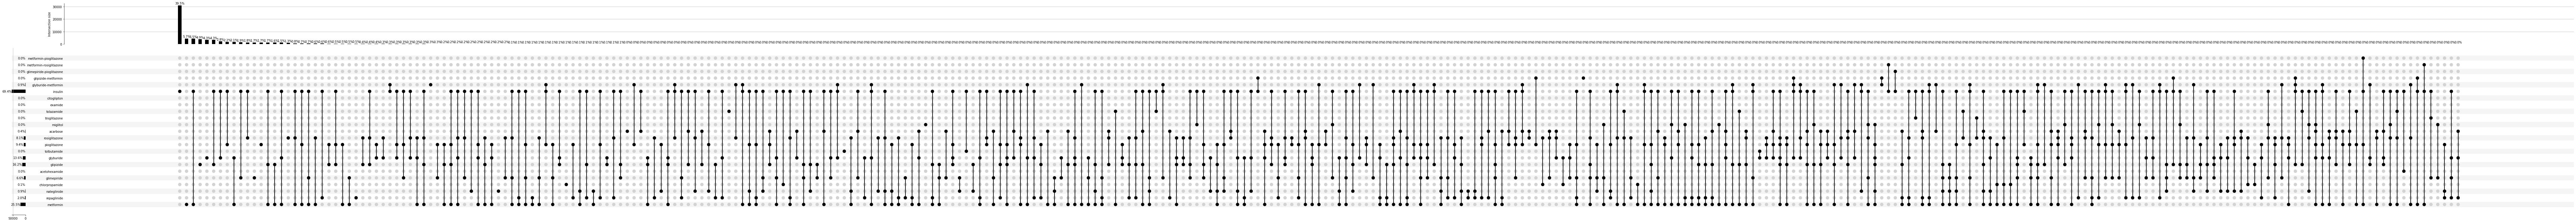

In [25]:
import upsetplot
upsetplot.plot(upsetplot.from_contents(contents_real), sort_by = 'cardinality', sort_categories_by = None, show_percentages = True)
plt.savefig('upsetplot_real.pdf')